<a href="https://colab.research.google.com/github/Abhilash1781/DL-Simplified/blob/Brain/brain_Tumor_Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import glob

# **IMPORTING THE DATASET**

 First I dowloaded from the given link - https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

 It was in zip file , since we can't upload folder in google colab but we can upload a zip file . Below is the code about how to unzip the file.

In [ ]:
from zipfile import ZipFile
file_name = '/content/archive (2).zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')


Done


Dataset contains two classes , "no" folder contains 1500 MRI images of non-tumorous brain and "yes" folder contains 1500 MRI images of tumor brain .  

In [ ]:
Non_tumorous_images = '/content/no'
Tumorous_images = '/content/yes'

To find number of images present in each folder ...

In [ ]:
print('Total number of Non_Tumor Images are ' , len(os.listdir(Non_tumorous_images)))
print('Total number of Tumor Images are ' , len(os.listdir(Tumorous_images)))

Total number of Non_Tumor Images are  1500
Total number of Tumor Images are  1500


In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
 


Display random tumorous images which are present in "yes" folder 

Working with 1500 images
Image examples: 
y1394.jpg


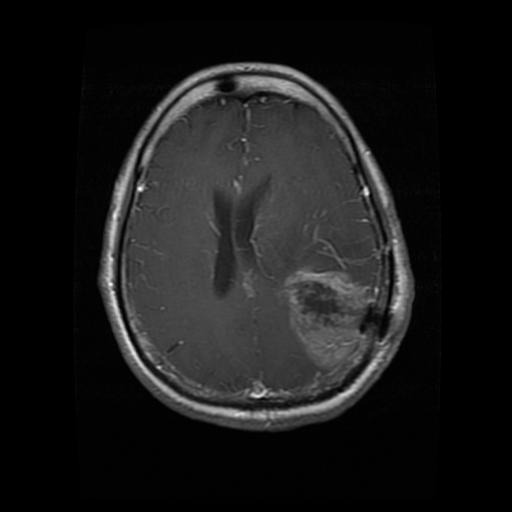

y856.jpg


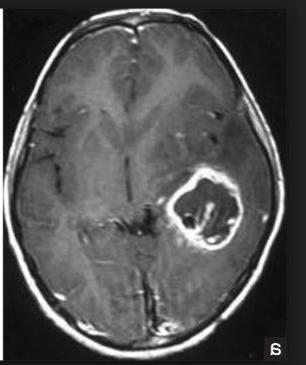

y810.jpg


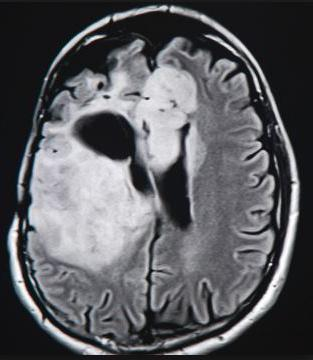

y567.jpg


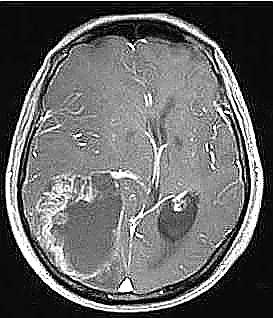

y87.jpg


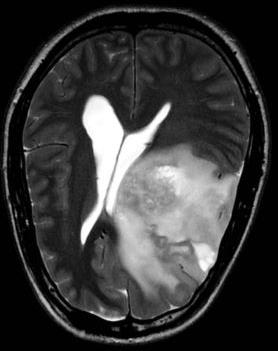

In [ ]:
folder = Tumorous_images


onlytumorfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlytumorfiles)))
print("Image examples: ")


for i in range(5):
    print(onlytumorfiles[i])
    display(_Imgdis(filename=folder + "/" + onlytumorfiles[i], width=180, height=180))

Display random non tumorous images which are present "no" folder 

Working with 1500 images
Image examples: 
no456.jpg


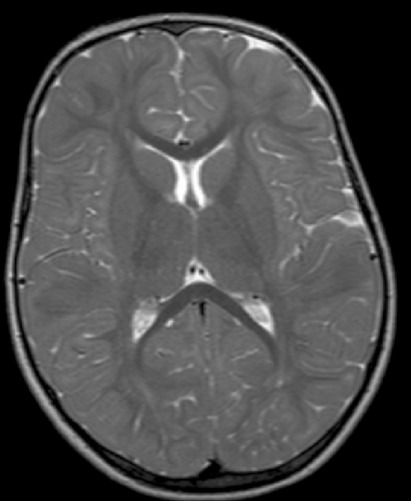

no529.jpg


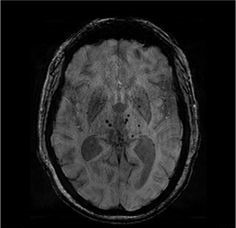

no833.jpg


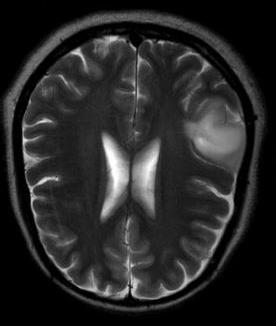

no457.jpg


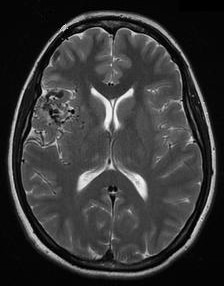

no93.jpg


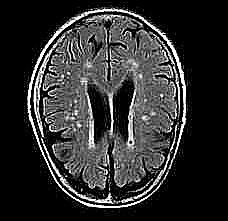

In [ ]:
folder = Non_tumorous_images


only_non_tumorous_files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(only_non_tumorous_files)))
print("Image examples: ")


for i in range(5):
    print(only_non_tumorous_files[i])
    display(_Imgdis(filename=folder + "/" + only_non_tumorous_files[i], width=180, height=180))

The image shape contains 3 values 
*   Height of the image
*   Width of the image
*   Color channels

"im.max" is nothing but displays maximum color levels in each channel . Here, the RGB levels are in the range 0 - 255 .  







In [ ]:

images = []
for i in range(10):
  im = img.imread('yes/y{}.jpg'.format(i))
  images.append(im)
  print('image shape', im.shape, 'maximum color level', im.max())

image shape (348, 287, 3) maximum color level 255
image shape (630, 587, 3) maximum color level 255
image shape (309, 232, 3) maximum color level 255
image shape (351, 273, 3) maximum color level 255
image shape (336, 264, 3) maximum color level 255
image shape (303, 223, 3) maximum color level 255
image shape (355, 290, 3) maximum color level 255
image shape (318, 273, 3) maximum color level 255
image shape (347, 300, 3) maximum color level 255
image shape (173, 189, 3) maximum color level 255


# **Image Data Generator**

Using ImageDataGenerator to convert the images into the batches of data arrays in memory so that we can feed this for training

In [ ]:
from tensorflow import keras
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator
gen = ImageDataGenerator()
     

"flow_from_directory" to generate the batches 

In [ ]:

iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('yes','no')
)

Found 3000 images belonging to 2 classes.


In [ ]:
# The batch has 2 elements
batch = iterator.next()
len(batch)

2

In [ ]:
print(type(batch[0]))
print(type(batch[1]))
     

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:

print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 256, 256, 3)
float32
255.0
(32, 2)
float32


# **TRAIN - TEST SPLIT**

Splitted dataset into 80% for training and 20% for testing . 
Size of the image --> 256 , 256  .

In [ ]:

imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2
)

batch_size = 12
height, width = (256,256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('yes','no'),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('yes','no'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


# **Simple CNN model**

In [ ]:
model_1 = keras.models.Sequential()

model_1.add(  keras.layers.Conv2D( 24, 5, input_shape=(256,256,3), activation='relu', ))
model_1.add( keras.layers.MaxPooling2D(2) )
model_1.add(  keras.layers.Conv2D(  48, 5, activation='relu', ))
model_1.add( keras.layers.MaxPooling2D(2) )
model_1.add(  keras.layers.Conv2D( 96, 5, activation='relu', ))
model_1.add( keras.layers.Flatten() )
model_1.add( keras.layers.Dropout(0.9) )
model_1.add( keras.layers.Dense(2, activation='softmax',))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 24)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten_1 (Flatten)         (None, 311904)           

In [ ]:
model_1.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc'])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model_1.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    epochs=10,
)

Epoch 1/10


<ipython-input-50-8f19670cf8b8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_1.fit_generator(


200/200 [==============================] - 482s 2s/step - loss: 0.5432 - acc: 0.7508 - val_loss: 0.4145 - val_acc: 0.8183
Epoch 2/10
200/200 [==============================] - 465s 2s/step - loss: 0.3692 - acc: 0.8458 - val_loss: 0.3139 - val_acc: 0.8800
Epoch 3/10
200/200 [==============================] - 464s 2s/step - loss: 0.2828 - acc: 0.8879 - val_loss: 0.2016 - val_acc: 0.9283
Epoch 4/10
200/200 [==============================] - 465s 2s/step - loss: 0.2106 - acc: 0.9229 - val_loss: 0.1473 - val_acc: 0.9500
Epoch 5/10
200/200 [==============================] - 466s 2s/step - loss: 0.1670 - acc: 0.9388 - val_loss: 0.1045 - val_acc: 0.9683
Epoch 6/10
200/200 [==============================] - 463s 2s/step - loss: 0.1496 - acc: 0.9492 - val_loss: 0.1192 - val_acc: 0.9683
Epoch 7/10
200/200 [==============================] - 463s 2s/step - loss: 0.1159 - acc: 0.9583 - val_loss: 0.1956 - val_acc: 0.9517
Epoch 8/10
200/200 [==============================] - 467s 2s/step - loss: 0.113

# **PLOT THE CURVES**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history, yrange):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

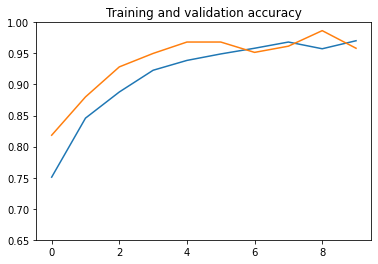

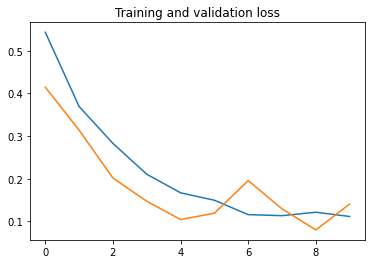

In [ ]:
plot_history(history, (0.65, 1.))